In [20]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [16]:
fair_probs = torch.ones([6]) / 6
# 在fair_probs向量中采样1次，它在索引i处的值是采样结果中i出现的次数
multinomial.Multinomial(3, fair_probs).sample()

tensor([2., 0., 0., 0., 1., 0.])

In [19]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1830, 0.1660, 0.1510, 0.1580, 0.1810, 0.1610])

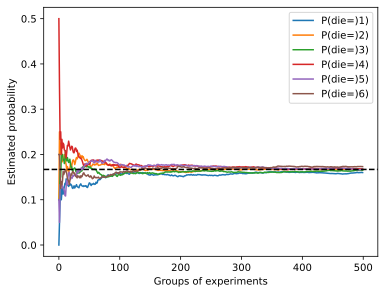

In [22]:
# 进行500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=)" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

(tensor([[0.0000, 0.1000, 0.1000, 0.5000, 0.1000, 0.2000],
         [0.0500, 0.2500, 0.1000, 0.3500, 0.0500, 0.2000],
         [0.1000, 0.2000, 0.1667, 0.2333, 0.1333, 0.1667],
         ...,
         [0.1604, 0.1669, 0.1649, 0.1677, 0.1669, 0.1733],
         [0.1603, 0.1667, 0.1647, 0.1681, 0.1669, 0.1731],
         [0.1600, 0.1664, 0.1652, 0.1680, 0.1672, 0.1732]]),
 tensor([[0., 1., 1., 5., 1., 2.],
         [1., 4., 1., 2., 0., 2.],
         [2., 1., 3., 0., 3., 1.],
         ...,
         [4., 0., 1., 0., 4., 1.],
         [1., 1., 1., 4., 2., 1.],
         [0., 0., 4., 1., 3., 2.]]),
 tensor([[  0.,   1.,   1.,   5.,   1.,   2.],
         [  1.,   5.,   2.,   7.,   1.,   4.],
         [  3.,   6.,   5.,   7.,   4.,   5.],
         ...,
         [799., 831., 821., 835., 831., 863.],
         [800., 832., 822., 839., 833., 864.],
         [800., 832., 826., 840., 836., 866.]]))

# 练习

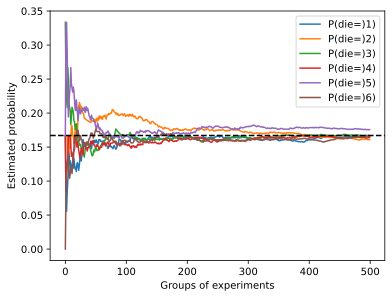

In [37]:
# 进行500组实验，每组抽取10个样本
counts = multinomial.Multinomial(6, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=)" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [2]:
list??